In [120]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [121]:
url = "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"

In [122]:
df = pd.read_csv(url)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


### Exploratory Data Analysis (EDA)

-   Fill missing values
-   Remove outliers
-   Univariate Analysis
-   Multivariate Analysis


In [125]:
(df[["x", "y", "z"]] == 0).sum()

x     8
y     7
z    20
dtype: int64

In [126]:
df = df[(df[["x", "y", "z"]] != 0).all(axis=1)]

df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00
x,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
y,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


<AxesSubplot: xlabel='carat'>

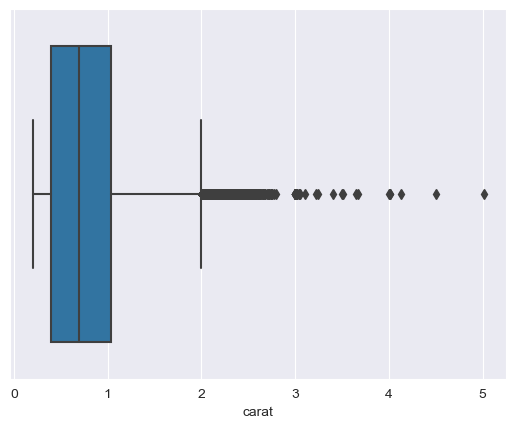

In [127]:
sns.boxplot(x=df["carat"])

<AxesSubplot: xlabel='table'>

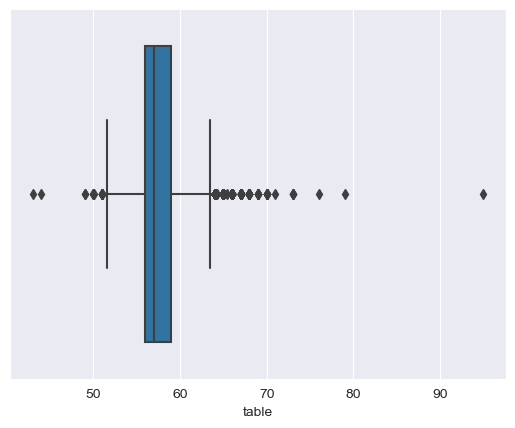

In [128]:
sns.boxplot(x=df["table"])

<AxesSubplot: xlabel='x'>

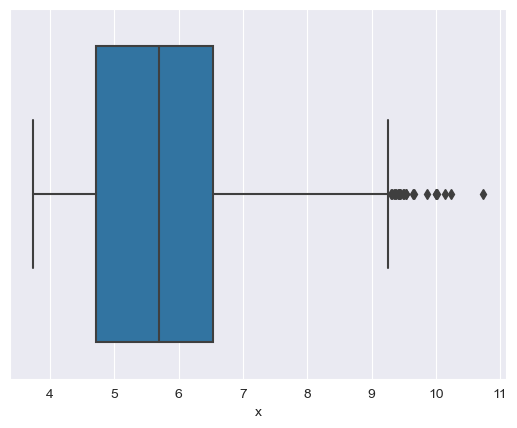

In [129]:
sns.boxplot(x=df["x"])

In [130]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

IQR

carat       0.64
depth       1.50
table       3.00
price    4374.25
x           1.83
y           1.82
z           1.13
dtype: float64

In [131]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(47524, 10)

In [132]:
cat_cols = df.select_dtypes(["O"]).columns
num_cols = df.select_dtypes(["int", "float"]).columns

cat_cols, num_cols

(Index(['cut', 'color', 'clarity'], dtype='object'),
 Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object'))

In [133]:
def value_counts_distribution(series: pd.Series, title: str):
    counts = series.value_counts()
    percent = (100 * series.value_counts(normalize=True)).round(1)

    print(pd.DataFrame({"Jumlah sampel": counts, "Persentase": percent}))

    counts.plot(kind="bar", title=title)
    plt.show()

           Jumlah sampel  Persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


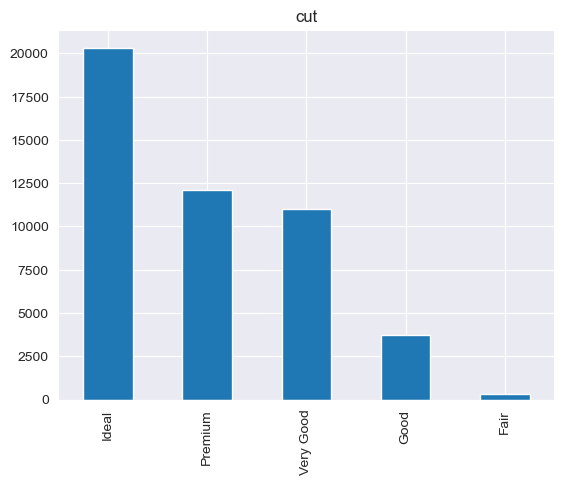

   Jumlah sampel  Persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


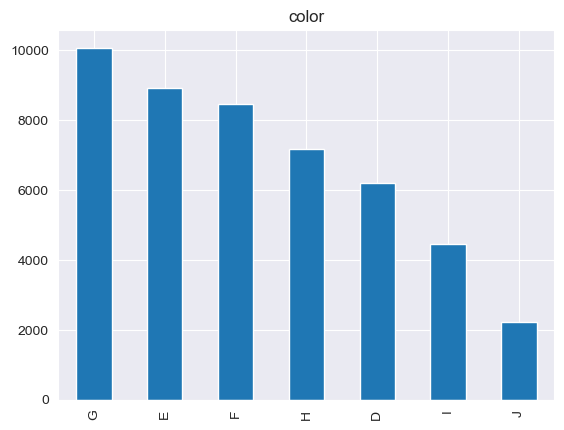

      Jumlah sampel  Persentase
SI1           11552        24.3
VS2           10928        23.0
SI2            7402        15.6
VS1            7373        15.5
VVS2           4683         9.9
VVS1           3463         7.3
IF             1650         3.5
I1              473         1.0


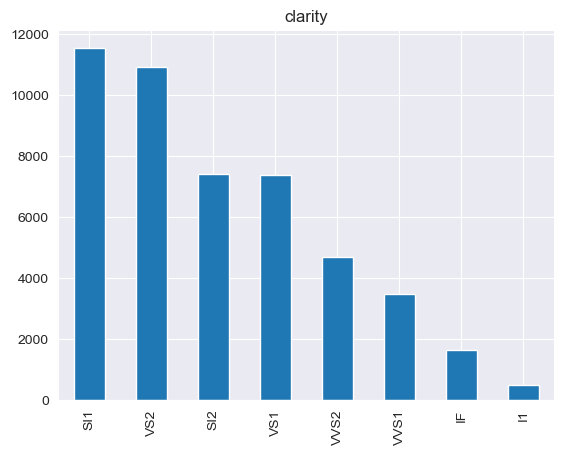

In [134]:
for cat in cat_cols:
    value_counts_distribution(df[cat], cat)

array([[<AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>,
        <AxesSubplot: title={'center': 'table'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>],
       [<AxesSubplot: title={'center': 'z'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

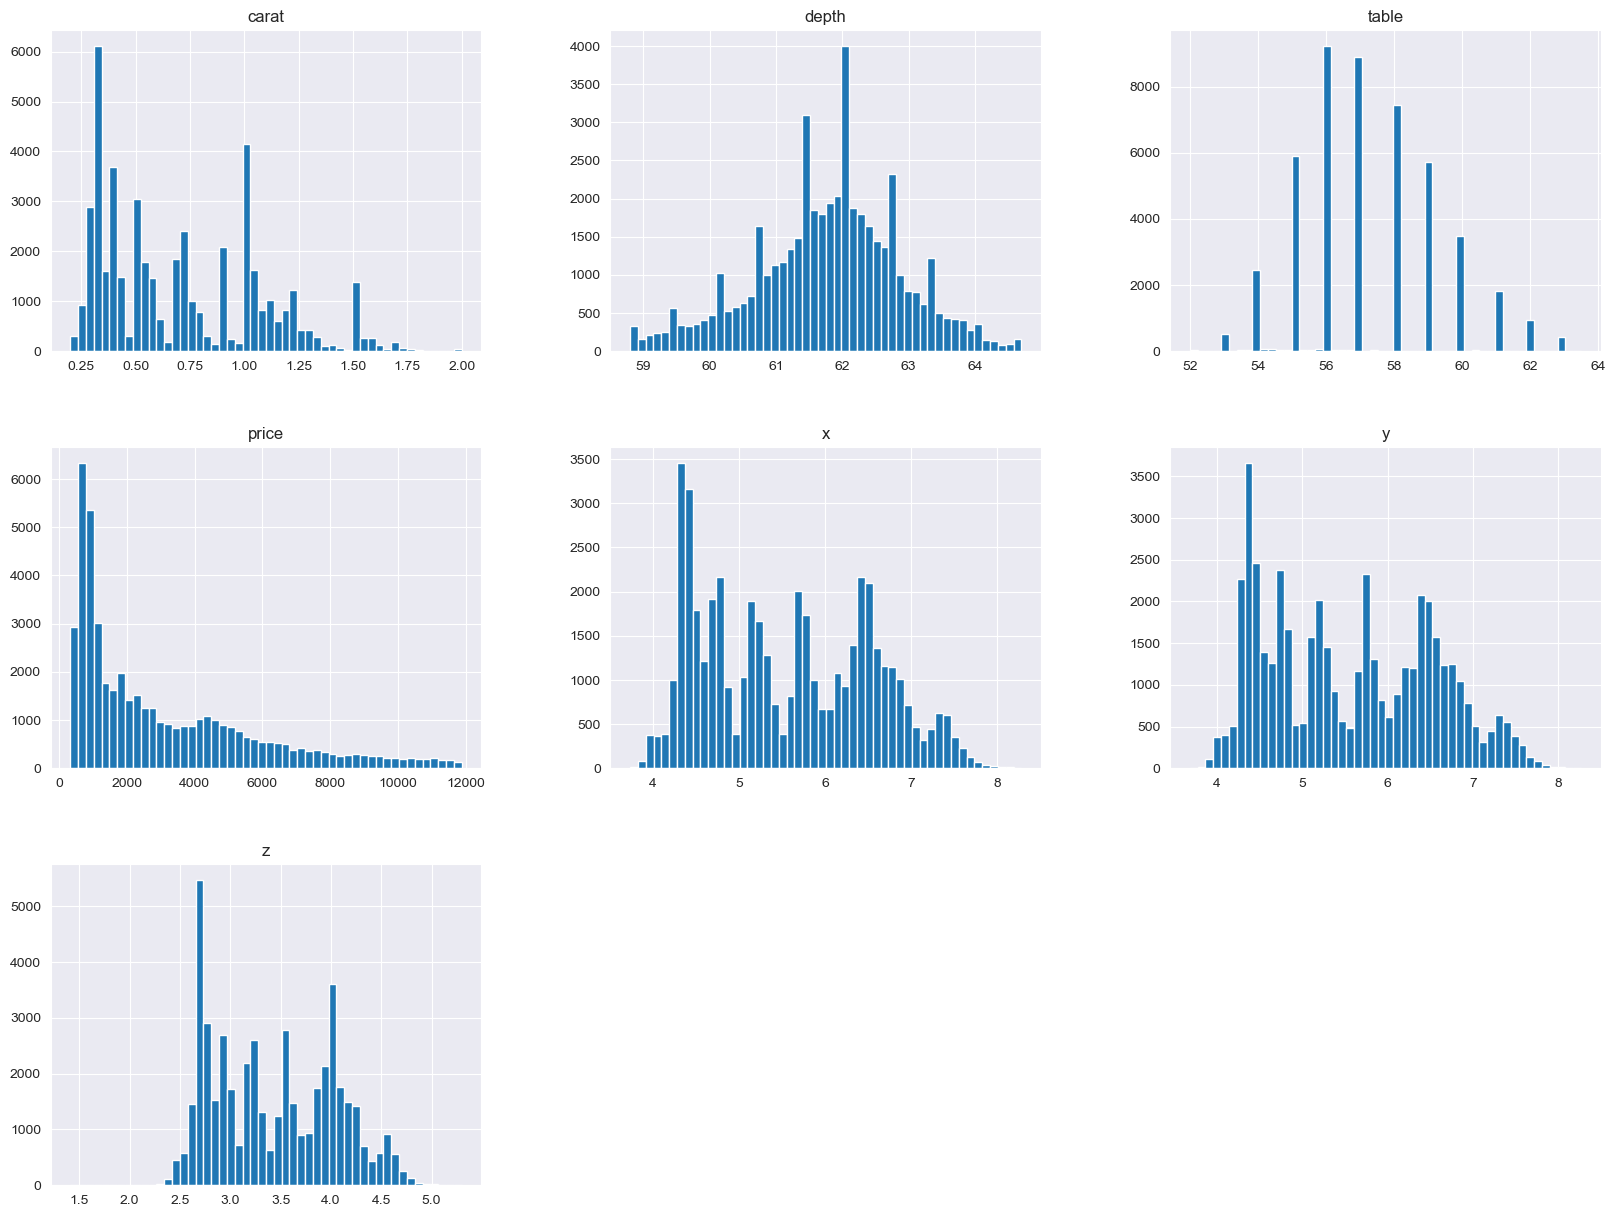

In [135]:
df.hist(bins=50, figsize=(20, 15))

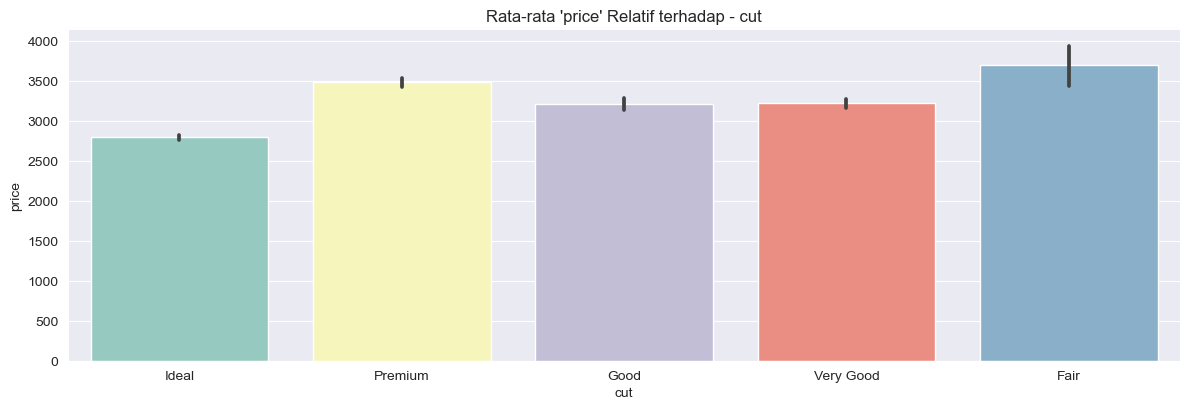

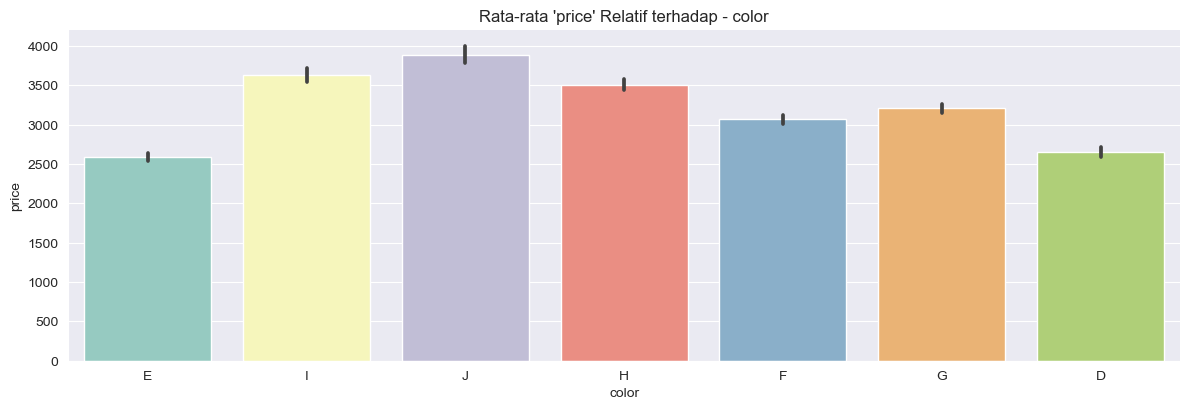

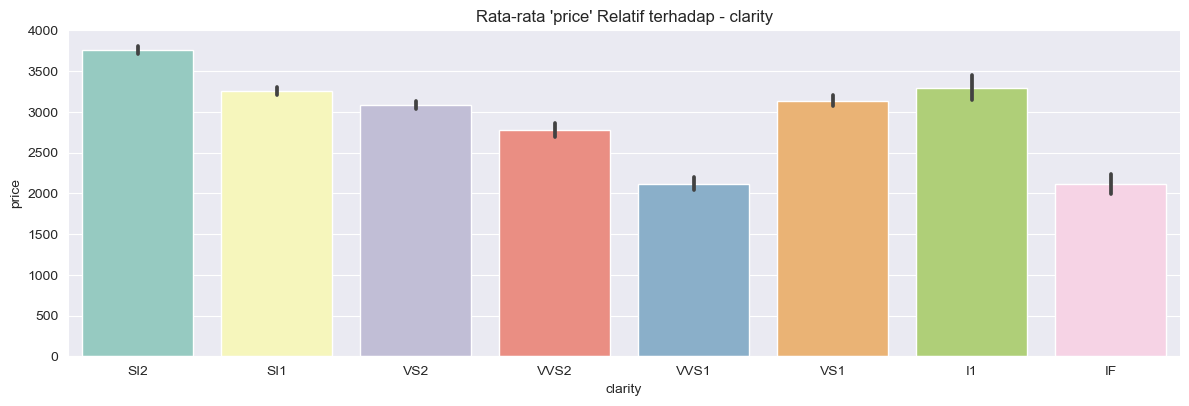

In [136]:
for cat in cat_cols:
    sns.catplot(
        x=cat,
        y="price",
        kind="bar",
        dodge=False,
        height=4,
        aspect=3,
        data=df,
        palette="Set3",
    )
    plt.title(f"Rata-rata 'price' Relatif terhadap - {cat}")

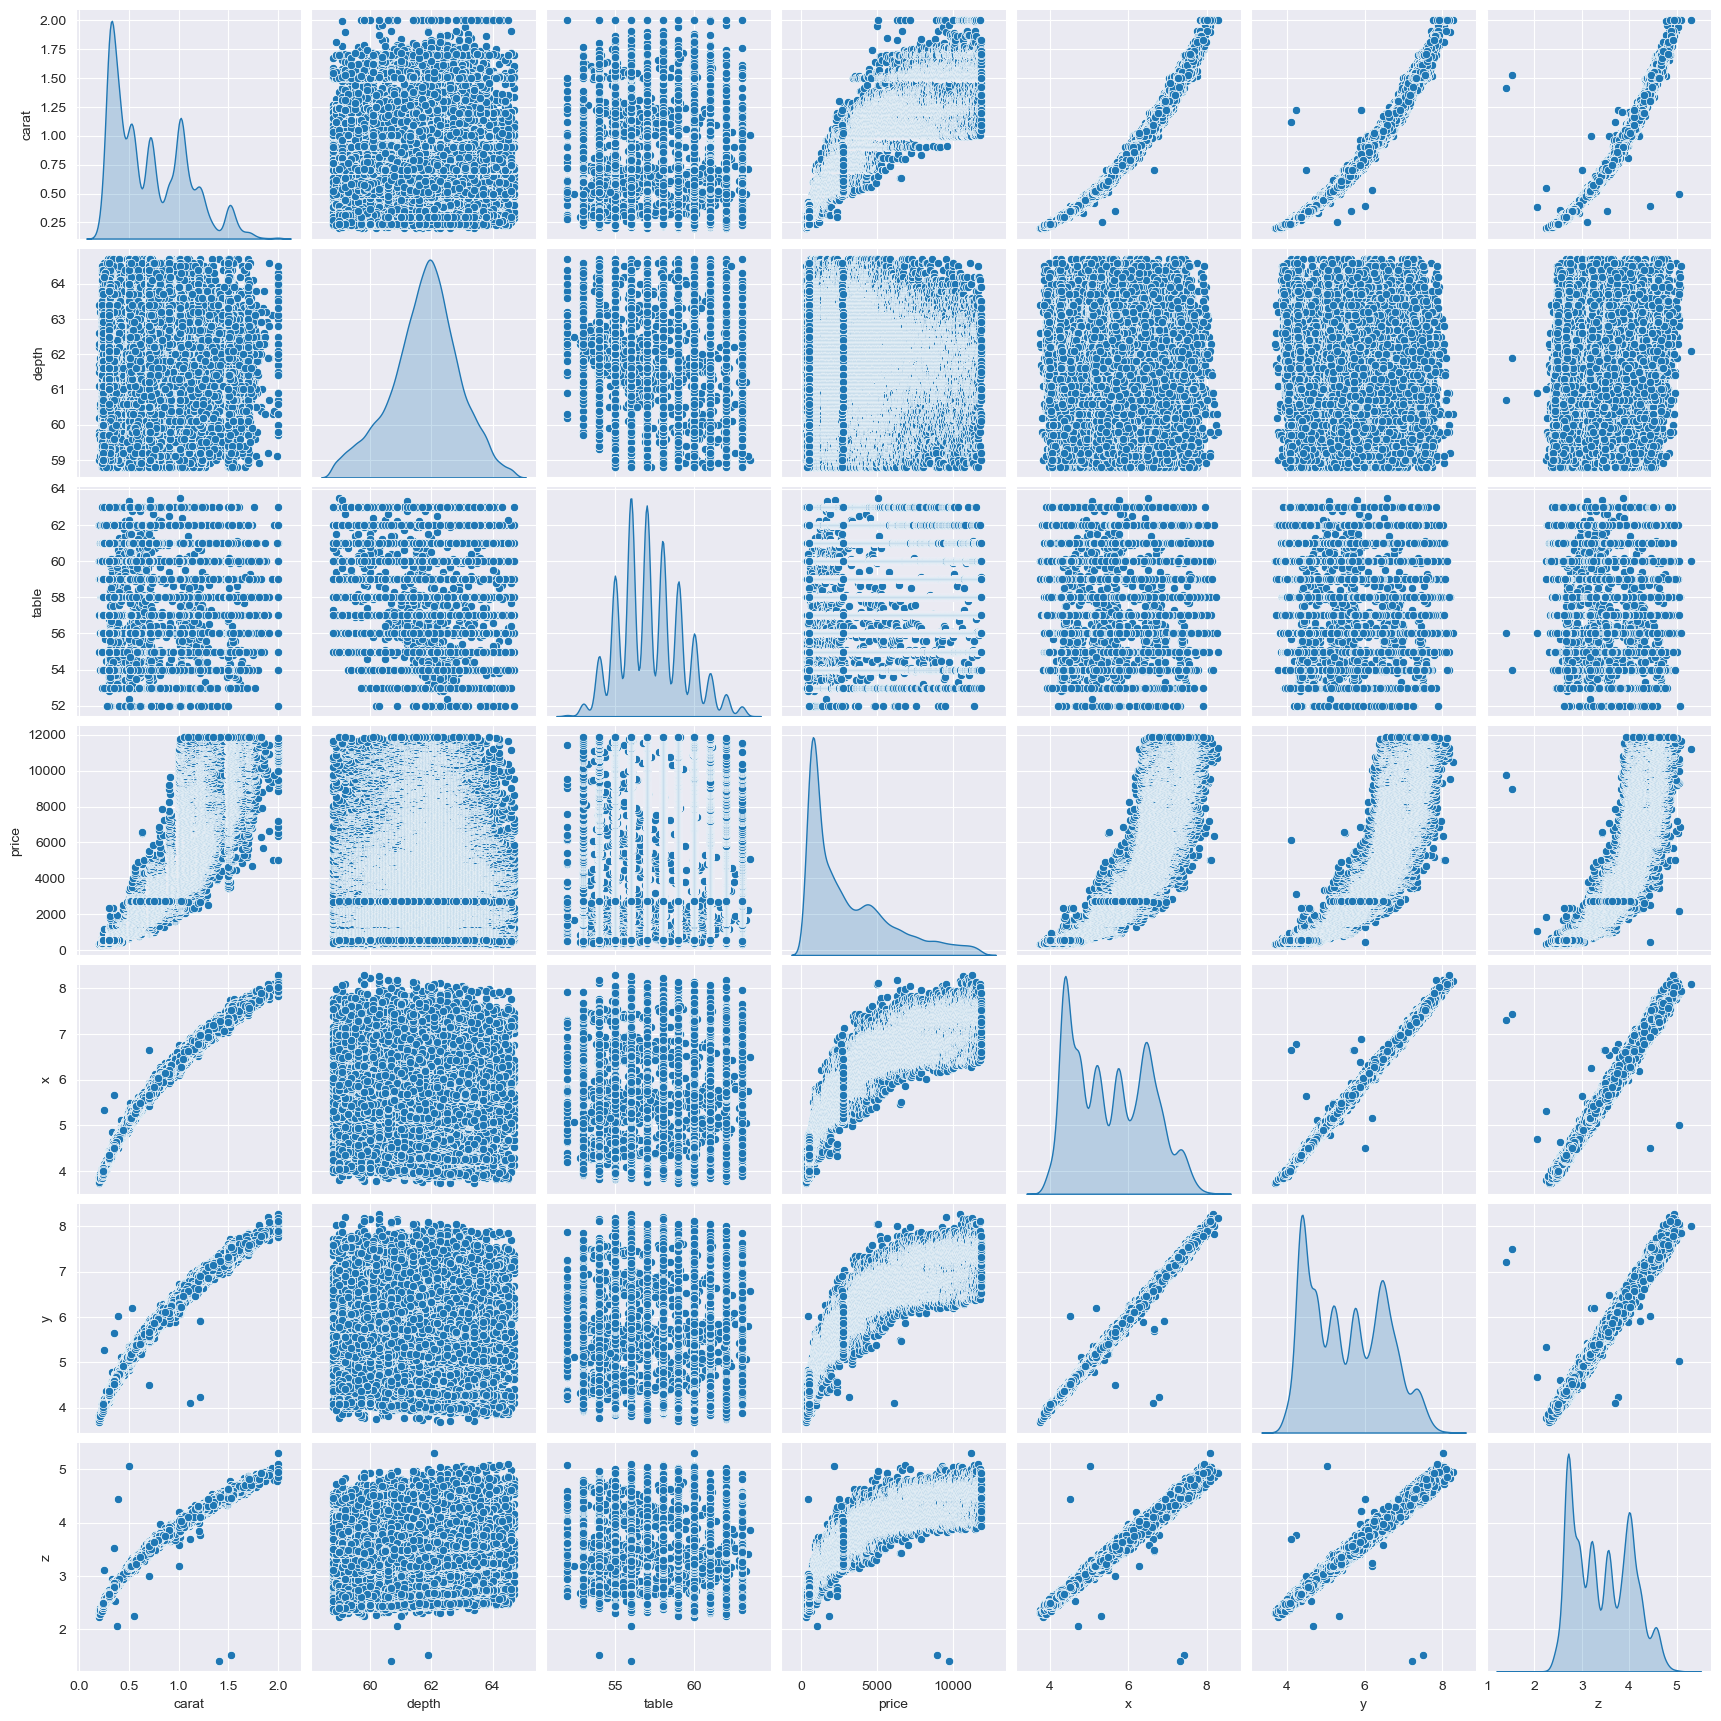

In [137]:
sns.pairplot(data=df, diag_kind="kde")

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

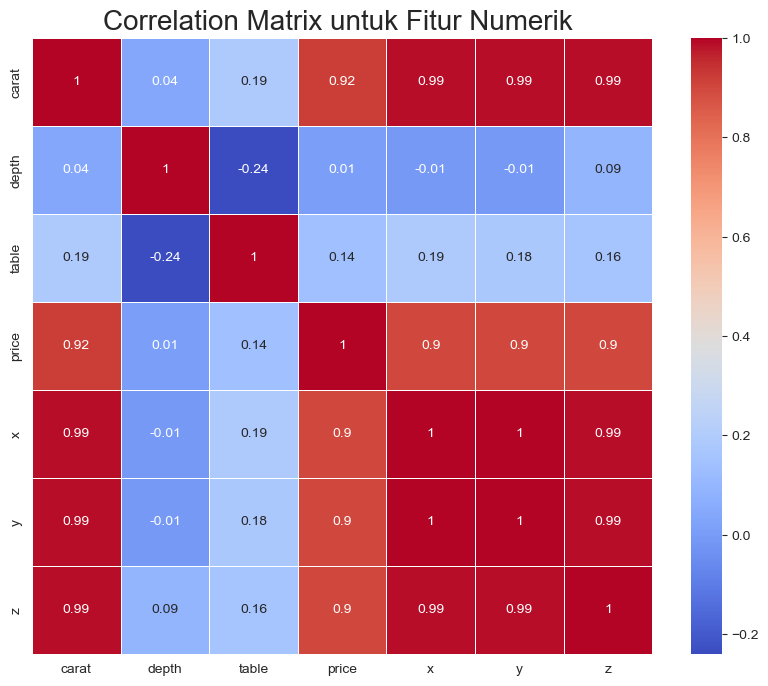

In [138]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [139]:
df = df.drop("depth", axis=1)

In [140]:
df.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


### Data preprocessing


In [141]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [142]:
df = pd.concat([df, pd.get_dummies(df["cut"], prefix="cut")], axis=1)
df = pd.concat([df, pd.get_dummies(df["color"], prefix="color")], axis=1)
df = pd.concat([df, pd.get_dummies(df["clarity"], prefix="clarity")], axis=1)
df = df.drop(["cut", "color", "clarity"], axis=1)

df.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [143]:
pca = PCA(n_components=1, random_state=42)

df["dimension"] = pca.fit_transform(df[["x", "y", "z"]]).flatten()
df = df.drop(["x", "y", "z"], axis=1)

In [144]:
X = df.drop("price", axis=1)
y = df["price"]

In [145]:
cat_cols = X.select_dtypes("object").columns
num_cols = X.select_dtypes("number").columns

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [147]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train.loc[:, num_cols])
X_test[num_cols] = scaler.transform(X_test.loc[:, num_cols])

X_train[num_cols].head()


,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
52420,0.188441,2.841243,-0.083337,-0.294665,-0.864809,-0.584811,1.827214,-0.386267,2.079203,-0.465224,...,-0.223623,-0.100538,-0.189389,-0.567171,2.324402,-0.428041,-0.546921,-0.279346,-0.330203,0.398508
44667,-1.050556,-1.117556,-0.083337,-0.294665,1.156324,-0.584811,-0.547281,-0.386267,-0.480953,-0.465224,...,-0.223623,-0.100538,-0.189389,-0.567171,-0.430218,-0.428041,1.828419,-0.279346,-0.330203,-1.158743
41205,-0.484927,-1.612406,-0.083337,-0.294665,1.156324,-0.584811,-0.547281,-0.386267,-0.480953,-0.465224,...,-0.223623,-0.100538,-0.189389,1.763135,-0.430218,-0.428041,-0.546921,-0.279346,-0.330203,-0.363739
4580,0.592462,-2.107255,-0.083337,-0.294665,-0.864809,-0.584811,1.827214,-0.386267,-0.480953,-0.465224,...,4.471807,-0.100538,-0.189389,-0.567171,-0.430218,2.336225,-0.546921,-0.279346,-0.330203,0.723596
35241,-0.915882,2.346393,-0.083337,-0.294665,-0.864809,1.709955,-0.547281,-0.386267,-0.480953,2.149504,...,-0.223623,-0.100538,-0.189389,-0.567171,-0.430218,-0.428041,1.828419,-0.279346,-0.330203,-0.909531


### Model Development

-   KNN
-   Random Forest
-   Boosting Algorithm


In [148]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


In [149]:
mse = pd.DataFrame(columns=["train", "test"], index=["KNN", "RF", "Boosting"])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {
    "KNN": KNeighborsRegressor(n_neighbors=3, n_jobs=-1),
    "RF": RandomForestRegressor(
        n_estimators=50, max_depth=16, random_state=42, n_jobs=-1
    ),
    "Boosting": AdaBoostRegressor(learning_rate=0.05, random_state=42),
}

In [150]:
for name, model in model_dict.items():
    model.fit(X_train, y_train)

    mse.loc[name, "train"] = (
        mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3
    )
    mse.loc[name, "test"] = (
        mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3
    )

In [151]:
mse

,train,test
KNN,116.901336,253.088581
RF,51.45329,135.820815
Boosting,891.994487,872.315682


<AxesSubplot: >

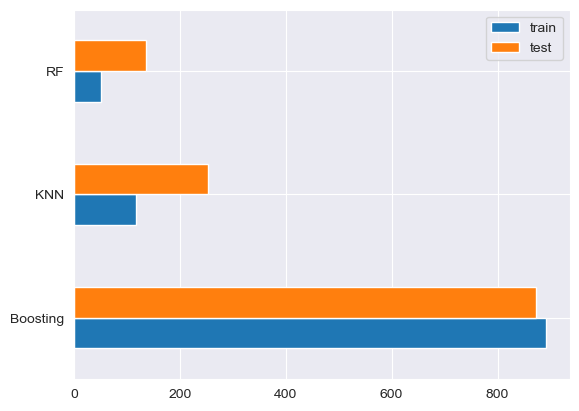

In [152]:
mse.sort_values(by="test", ascending=False).plot(kind="barh")